In [1]:
import numpy as np
import polymer_pl as pp
import scipy.constants as sc
temperature = 700  # K
l = np.array([6.951, 1.466, 2.540, 1.456, 2.967, 1.459, 2.513, 1.500])
dihedralA_kcal_mol = np.array([[180, 0.551967], [170, 0.557568],
                               [160, 0.57842], [150, 0.743988], [140, 1.15127],
                               [130, 1.76722], [120, 2.48711], [110, 3.17616],
                               [100, 3.6976], [90, 3.93171], [80, 3.8368],
                               [70, 3.38603], [60, 2.66725], [50, 1.79179],
                               [40, 0.954215], [30, 0.334189], [20, 0.0295074],
                               [10, 0], [0, 0.00945115]])
dihedralB_kcal_mol = np.array([[180, 0.496007], [170, 0.338429],
                               [160, 0.0933325], [150, 0], [140, 0.17495],
                               [130, 0.647714], [120, 1.29963], [110, 1.9583],
                               [100, 2.45073], [90, 2.6726], [80, 2.55251],
                               [70, 2.1469], [60, 1.56547], [50, 0.979727],
                               [40, 0.572042], [30, 0.409372], [20, 0.469453],
                               [10, 0.615015], [0, 0.652945]])

# Convert energy from kcal/mol to kJ/mol
conversion_factor = sc.calorie
dihedralA = np.copy(dihedralA_kcal_mol)
dihedralA[:, 1] *= conversion_factor
dihedralB = np.copy(dihedralB_kcal_mol)
dihedralB[:, 1] *= conversion_factor


Angle = np.array([-11, -11, 14, 14, -1.4, -1.4, 14, 14])
rotation = np.array([0, 2, 0, 1, 0, 1, 0, 2])
labels = {
    1: {
        'label': 'dihedralA',
        'color': 'b',
        'data': dihedralA
    },
    2: {
        'label': 'dihedralB',
        'color': 'm',
        'data': dihedralB
    },
}


In [2]:
p = pp.PolymerPersistence(l, Angle, temperature, rotation, labels)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    5.1s finished


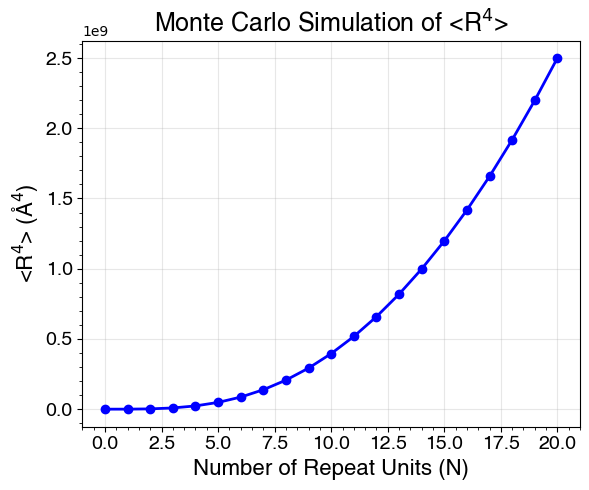

[0.00000000e+00 1.60377480e+05 2.08830961e+06 8.74849756e+06
 2.32135029e+07 4.82088001e+07 8.60068867e+07 1.38431647e+08
 2.06839809e+08 2.92322480e+08 3.95680027e+08 5.17530259e+08
 6.58495519e+08 8.18667628e+08 9.98337649e+08 1.19781989e+09
 1.41769418e+09 1.65753818e+09 1.91775386e+09 2.19850453e+09
 2.49976143e+09]


In [3]:
r4_mc = p.calc_mean_r4_monte_carlo(n_samples=500000,return_data=True)
print(r4_mc)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 485 out of 500 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    3.5s finished


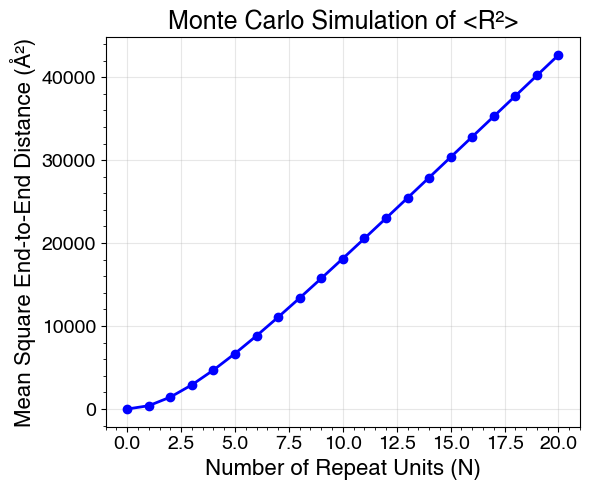

[    0.           400.22039715  1436.26589236  2913.4597137
  4696.19186518  6690.52419662  8831.24797681 11072.47550293
 13383.54727702 15744.6572131  18137.30637906 20552.6764326
 22989.28480517 25436.93250338 27893.64248811 30351.47430113
 32809.24295247 35266.59940203 37729.99105834 40197.54037997
 42663.97722731]


In [4]:
r2_mc = p.calc_mean_square_end_to_end_monte_carlo(n_samples=500000,return_data=True)
print(r2_mc)

In [5]:
r4_mc[-1] / r2_mc[-1]**2 # <R^4>/<R^2>^2

np.float64(1.3733330938265953)

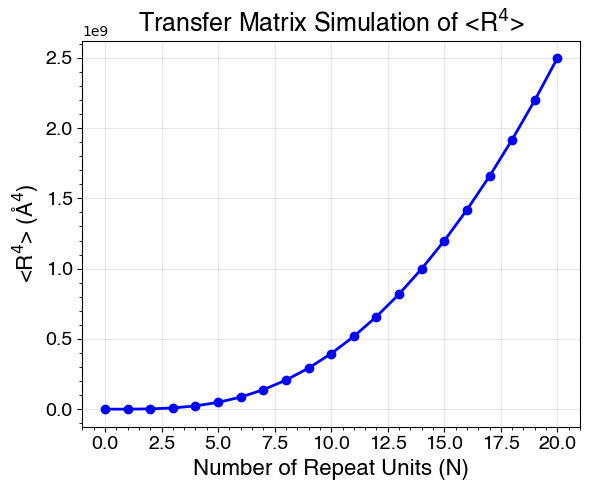

[0.00000000e+00 1.60382315e+05 2.08826338e+06 8.74500659e+06
 2.32109110e+07 4.82088923e+07 8.59921971e+07 1.38362256e+08
 2.06729025e+08 2.92179938e+08 3.95544465e+08 5.17449789e+08
 6.58366736e+08 8.18646619e+08 9.98550224e+08 1.19827026e+09
 1.41794858e+09 1.65768923e+09 1.91756827e+09 2.19764120e+09
 2.49794836e+09]


In [6]:
r4_tm = p.calc_mean_r4_transfer_matrix(return_data=True)
print(r4_tm)

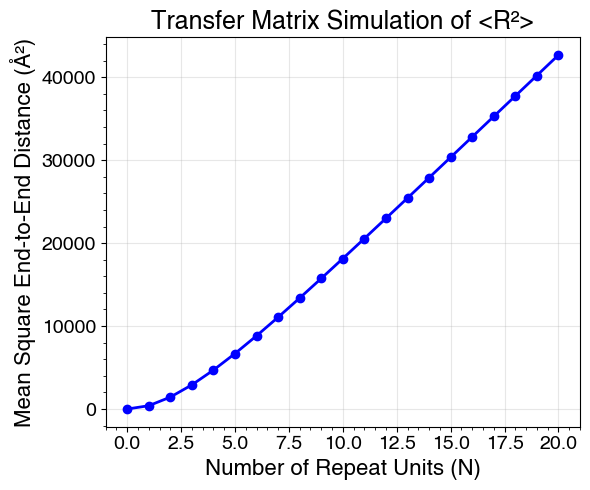

[    0.           400.20905099  1436.28502011  2913.1822946
  4695.39915047  6689.08496236  8829.23736888 11070.83475223
 13382.69445955 15743.21891424 18137.44930839 20555.02494555
 22988.76985082 25433.71383553 27886.4144719  30344.48748242
 32806.28148047 35270.65269071 37736.80891706 40204.20147255
 42672.45032827]


In [7]:
r2_tm = p.calc_mean_square_end_to_end_transfer_matrix(return_data=True)
print(r2_tm)

In [8]:
r4_tm[-1] / r2_tm[-1]**2 # <R^4>/<R^2>^2

np.float64(1.3717920856511574)

In [9]:
np.nan_to_num(np.abs(r4_mc - r4_tm)/r4_tm, nan=0) # relative error

C:\Users\A\AppData\Local\Temp\ipykernel_19304\2179064193.py:1: RuntimeWarning: invalid value encountered in divide
  np.nan_to_num(np.abs(r4_mc - r4_tm)/r4_tm, nan=0) # relative error


array([0.00000000e+00, 3.01444219e-05, 2.21399295e-05, 3.99195956e-04,
       1.11665618e-04, 1.91188973e-06, 1.70824799e-04, 5.01516030e-04,
       5.35892336e-04, 4.87856578e-04, 3.42720816e-04, 1.55512470e-04,
       1.95609750e-04, 2.56631141e-05, 2.12883497e-04, 3.75850603e-04,
       1.79416207e-04, 9.11195569e-05, 9.67841956e-05, 3.92844951e-04,
       7.25824621e-04])